# 1.data distribution

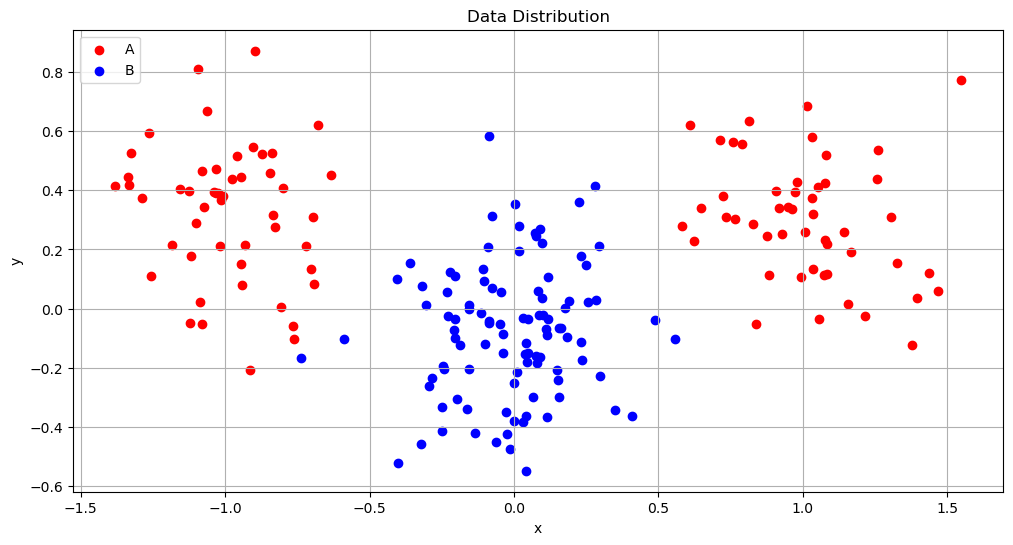

In [36]:
import numpy as np
import matplotlib.pyplot as plt

#parameters
n = 100
mA = np.array([1.0, 0.3])
mB = np.array([0.0, -0.1])
sigmaA = 0.2
sigmaB = 0.2

#generate data
classA_x = np.concatenate((np.random.randn(1, round(0.5*n)) * sigmaA - mA[0],
                                np.random.randn(1, round(0.5*n)) * sigmaA + mA[0]), axis=1)
classA_y = np.random.randn(1, n)*sigmaA + mA[1]
ClassA = np.concatenate((classA_x, classA_y), axis=0) #2*n matrix
ClassB = np.random.randn(2,n)*sigmaB + mB.reshape(2,1)  #2*n matrix


#plot data
plt.figure(figsize=(12, 6))
plt.scatter(ClassA[0, :], ClassA[1, :], c='r', label='A')
plt.scatter(ClassB[0, :], ClassB[1, :], c='b', label='B')
plt.title("Data Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [37]:
ClassA.shape

(2, 100)

# 2.Model class

In [38]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.W = np.random.normal(loc=0,scale=1, size=(hidden_size, input_size+ 1)) # input to hidden
        self.v = np.random.normal(loc=0,scale=1, size=(output_size, hidden_size+ 1 )) # hidden to output
        self.dw = np.zeros(self.W.shape)
        self.dv = np.zeros(self.v.shape)

    def transfer_function(self, x):
        return 2 / (1 + np.exp(-x)) - 1

    def TF_derivative(self, x):
        derivative = self.transfer_function(x)
        return (1 + derivative) * (1 - derivative) / 2

    def forward(self, X):
        X = np.vstack((X, np.ones((1, X.shape[1])))) # (D+1)*N
        self.hin = np.dot(self.W , X)
        hout = self.transfer_function(self.hin)# H*N

        self.hout = np.vstack((hout, np.ones((1,hout.shape[1])))) # (H+1)*N
        self.oin = np.dot(self.v, self.hout)# O*N
        self.out = self.transfer_function(self.oin) # O*N
        return self.out
    

    def backward(self, X, T, output):
        #m = X.shape[1]
        X = np.vstack((X, np.ones((1, X.shape[1])))) # (D+1)*N
        m = 1
        delta_out = (output - T) * self.TF_derivative(self.oin)# O*N
        dV = np.dot(delta_out, self.hout.T) / m

        delta_hidden = np.dot(self.v[:, :-1].T,delta_out) * self.TF_derivative(self.hin)# H*N
        dW = np.dot(delta_hidden, X.T) / m
        self.dW_current, self.dV_current = dW, dV

    def weight_update(self, learning_rate,alpha=0.9):
        self.dv = alpha * self.dv - (1 - alpha) * self.dV_current
        self.dw = alpha * self.dw - (1 - alpha) * self.dW_current
        self.W += learning_rate * self.dw
        self.v += learning_rate * self.dv

    def mse(self, output, target):
        return np.mean((output - target) ** 2)
    
    def error_rate_binary(self, output, target):
        return np.sum(output*target<0)/output.shape[1]
    
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[0, :].min() - 0.5, X[0, :].max() + 0.5
    y_min, y_max = X[1, :].min() - 0.5, X[1, :].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()].T
    outputs = model.forward(grid)
    Z = outputs.squeeze().reshape(xx.shape)

    plt.figure(figsize=(12, 6))
    plt.contourf(xx, yy, Z, levels=[ -5,0, 5], alpha=0.5, cmap=plt.cm.coolwarm)
    plt.scatter(X[0, :], X[1, :], c=y.squeeze(), edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("Decision Boundary")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

In [39]:
labels = np.concatenate((np.ones(n), -np.ones(n))).reshape(1,200) #1 for class A 
labels.shape
class_total = np.concatenate((ClassA, ClassB), axis=1)

Hidden size:1, Epoch [5/2000], MSE: 1.3072, Error: 0.5000
Hidden size:1, Epoch [10/2000], MSE: 1.2596, Error: 0.5000
Hidden size:1, Epoch [15/2000], MSE: 1.1964, Error: 0.5000
Hidden size:1, Epoch [20/2000], MSE: 1.1304, Error: 0.5000
Hidden size:1, Epoch [25/2000], MSE: 1.0723, Error: 0.5000
Hidden size:1, Epoch [30/2000], MSE: 1.0290, Error: 0.5000
Hidden size:1, Epoch [35/2000], MSE: 1.0019, Error: 0.5000
Hidden size:1, Epoch [40/2000], MSE: 0.9880, Error: 0.5000
Hidden size:1, Epoch [45/2000], MSE: 0.9823, Error: 0.3350
Hidden size:1, Epoch [50/2000], MSE: 0.9802, Error: 0.3700
Hidden size:1, Epoch [55/2000], MSE: 0.9792, Error: 0.4650
Hidden size:1, Epoch [60/2000], MSE: 0.9779, Error: 0.4900
Hidden size:1, Epoch [65/2000], MSE: 0.9762, Error: 0.4850
Hidden size:1, Epoch [70/2000], MSE: 0.9741, Error: 0.4450
Hidden size:1, Epoch [75/2000], MSE: 0.9718, Error: 0.4250
Hidden size:1, Epoch [80/2000], MSE: 0.9694, Error: 0.3750
Hidden size:1, Epoch [85/2000], MSE: 0.9669, Error: 0.325

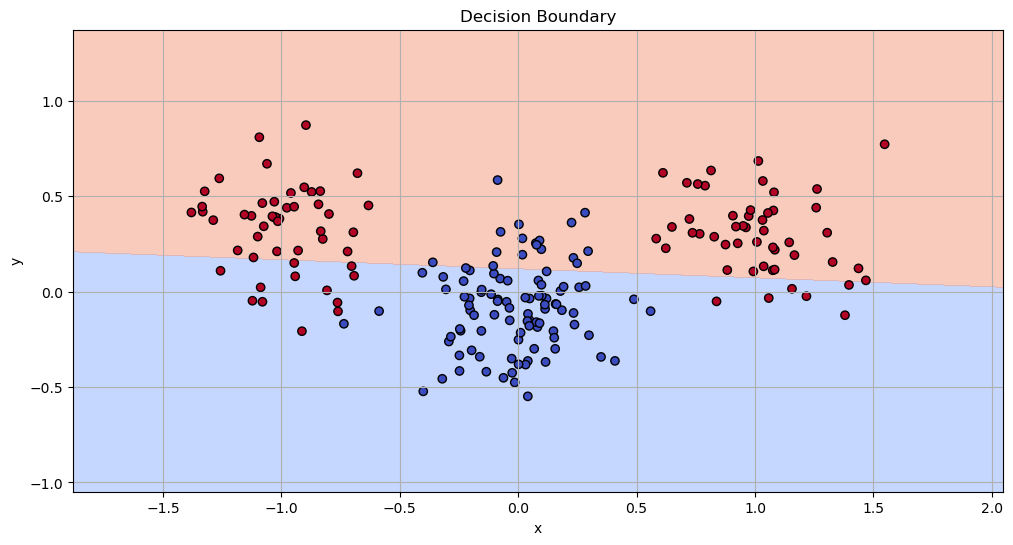

Hidden size:4, Epoch [5/2000], MSE: 1.4650, Error: 0.5000
Hidden size:4, Epoch [10/2000], MSE: 1.3807, Error: 0.5000
Hidden size:4, Epoch [15/2000], MSE: 1.2589, Error: 0.5000
Hidden size:4, Epoch [20/2000], MSE: 1.1283, Error: 0.5000
Hidden size:4, Epoch [25/2000], MSE: 1.0269, Error: 0.6700
Hidden size:4, Epoch [30/2000], MSE: 0.9726, Error: 0.4650
Hidden size:4, Epoch [35/2000], MSE: 0.9498, Error: 0.2600
Hidden size:4, Epoch [40/2000], MSE: 0.9350, Error: 0.2550
Hidden size:4, Epoch [45/2000], MSE: 0.9174, Error: 0.2500
Hidden size:4, Epoch [50/2000], MSE: 0.8973, Error: 0.2500
Hidden size:4, Epoch [55/2000], MSE: 0.8779, Error: 0.2600
Hidden size:4, Epoch [60/2000], MSE: 0.8610, Error: 0.2650
Hidden size:4, Epoch [65/2000], MSE: 0.8465, Error: 0.2750
Hidden size:4, Epoch [70/2000], MSE: 0.8334, Error: 0.2850
Hidden size:4, Epoch [75/2000], MSE: 0.8207, Error: 0.2750
Hidden size:4, Epoch [80/2000], MSE: 0.8083, Error: 0.2750
Hidden size:4, Epoch [85/2000], MSE: 0.7959, Error: 0.265

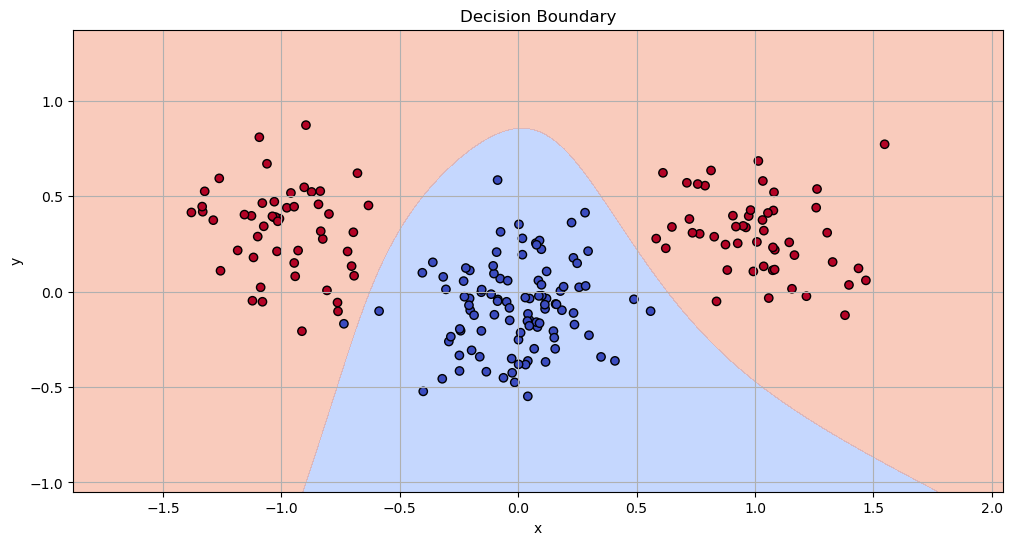

Hidden size:50, Epoch [5/2000], MSE: 1.4611, Error: 0.6050
Hidden size:50, Epoch [10/2000], MSE: 0.9754, Error: 0.4100
Hidden size:50, Epoch [15/2000], MSE: 0.6281, Error: 0.2100
Hidden size:50, Epoch [20/2000], MSE: 0.6590, Error: 0.2400
Hidden size:50, Epoch [25/2000], MSE: 0.6255, Error: 0.2250
Hidden size:50, Epoch [30/2000], MSE: 0.5455, Error: 0.1950
Hidden size:50, Epoch [35/2000], MSE: 0.5013, Error: 0.1800
Hidden size:50, Epoch [40/2000], MSE: 0.4836, Error: 0.1600
Hidden size:50, Epoch [45/2000], MSE: 0.4670, Error: 0.1500
Hidden size:50, Epoch [50/2000], MSE: 0.4485, Error: 0.1550
Hidden size:50, Epoch [55/2000], MSE: 0.4313, Error: 0.1500
Hidden size:50, Epoch [60/2000], MSE: 0.4169, Error: 0.1500
Hidden size:50, Epoch [65/2000], MSE: 0.4040, Error: 0.1450
Hidden size:50, Epoch [70/2000], MSE: 0.3915, Error: 0.1350
Hidden size:50, Epoch [75/2000], MSE: 0.3791, Error: 0.1350
Hidden size:50, Epoch [80/2000], MSE: 0.3672, Error: 0.1350
Hidden size:50, Epoch [85/2000], MSE: 0.3

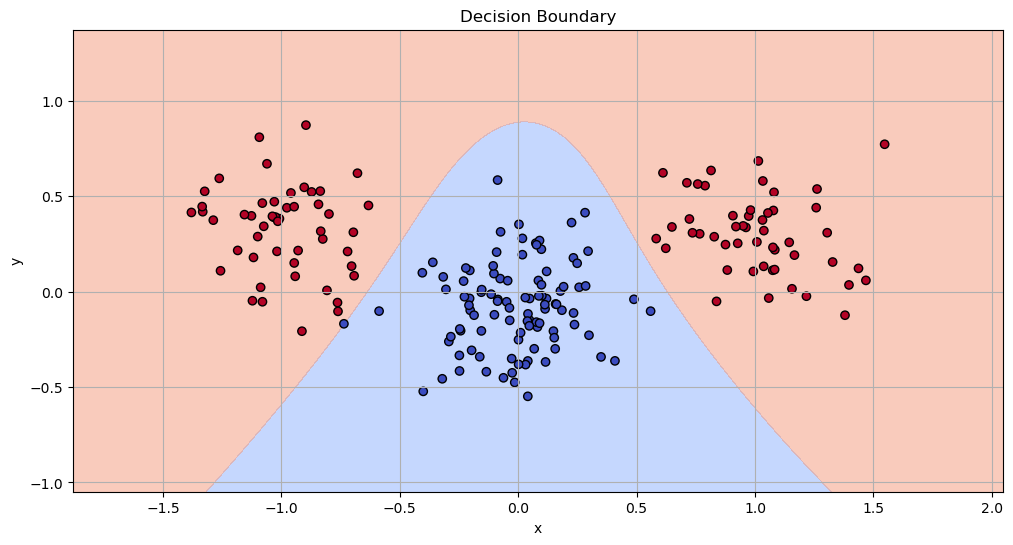

In [40]:
#parameters
input_size = class_total.shape[0]
hidden_size_list = [1,4,50]
output_size = 1
learning_rate = 0.001
epochs = 2000
alpha = 0.9
mse_list = []
error_list = []
for hidden_size in hidden_size_list:
    mlp = MLP(input_size, hidden_size, output_size)
    mse_sublist = []
    error_sublist = []
    for epoch in range(epochs):
        output = mlp.forward(class_total)
        loss = mlp.mse(output, labels)
        mse_sublist.append(loss)
        error = mlp.error_rate_binary(output,labels)
        error_sublist.append(error)
        mlp.backward(class_total, labels, output)
        mlp.weight_update(learning_rate,alpha)
        if (epoch + 1) % 5 == 0:
            print(f"Hidden size:{hidden_size}, Epoch [{epoch+1}/{epochs}], MSE: {loss:.4f}, Error: {error:.4f}")
    mse_list.append(mse_sublist)
    error_list.append(error_sublist)
    plot_decision_boundary(mlp, class_total, labels)

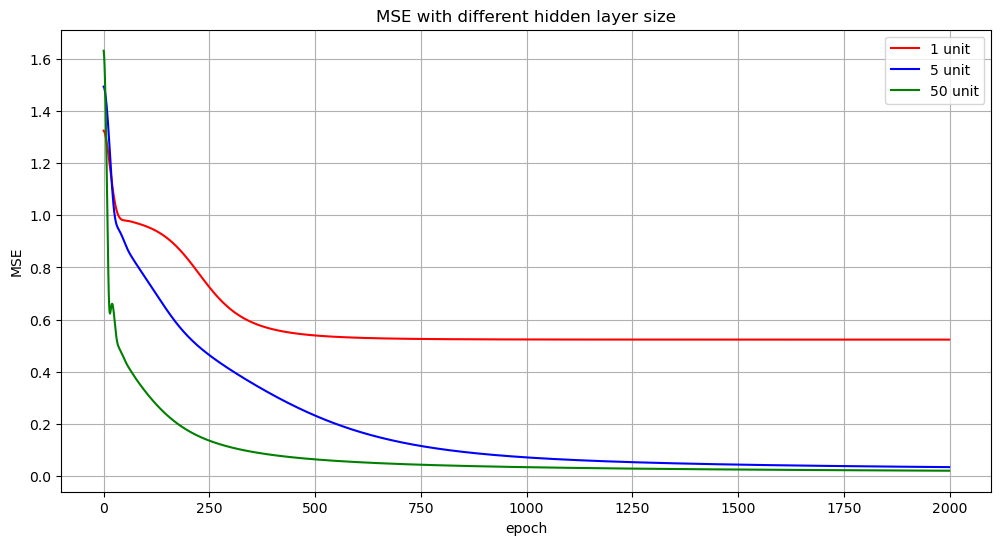

In [41]:

plt.figure(figsize=(12,6))
plt.plot(mse_list[0],label='1 unit',c='r')
plt.plot(mse_list[1],label='5 unit',c='b')
plt.plot(mse_list[2],label='50 unit',c='g')
plt.legend()
plt.title('MSE with different hidden layer size')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.grid(True)
plt.show()


# subsample

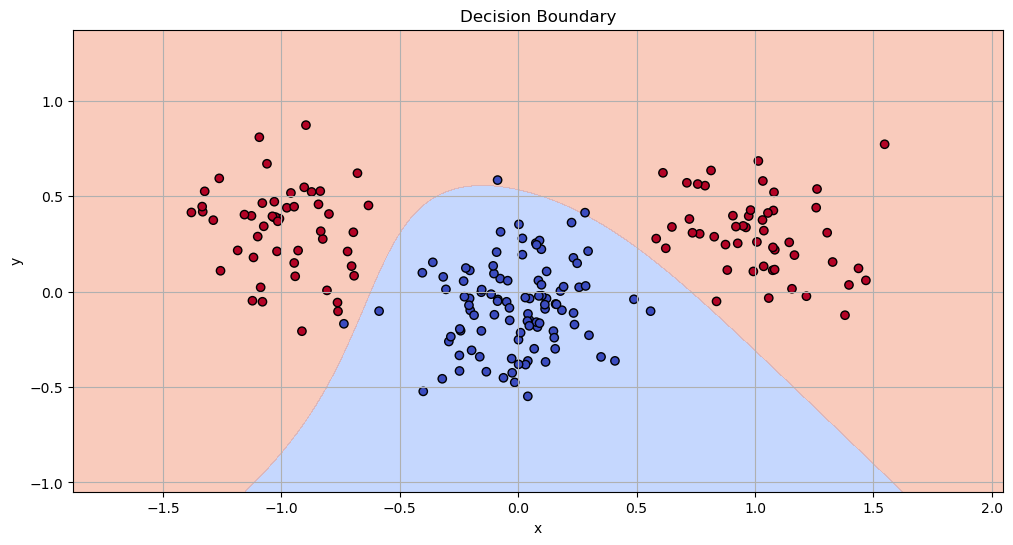

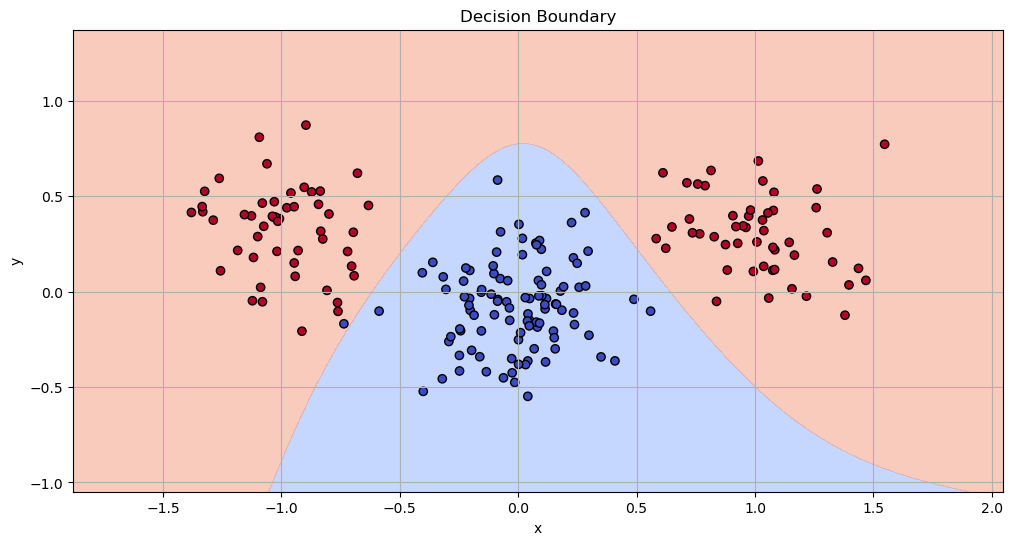

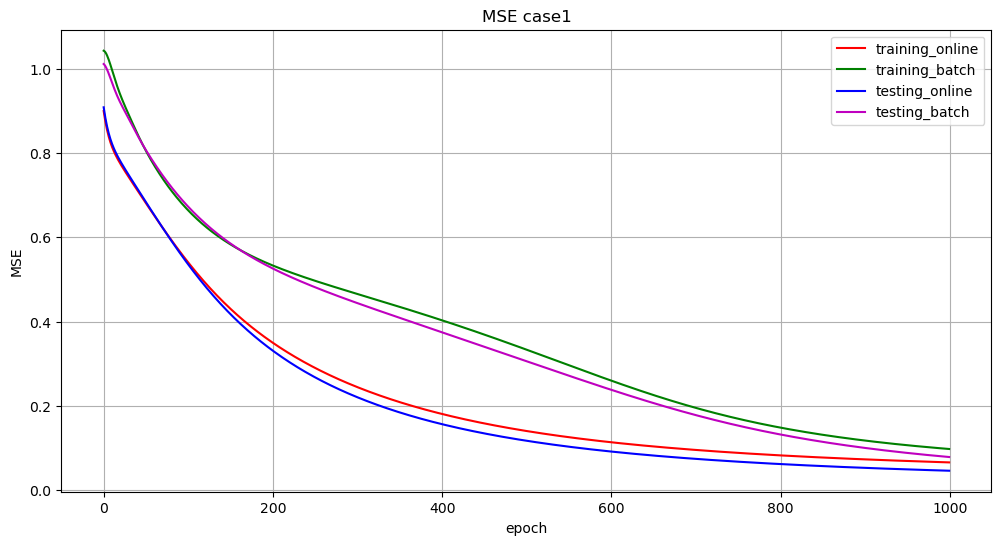

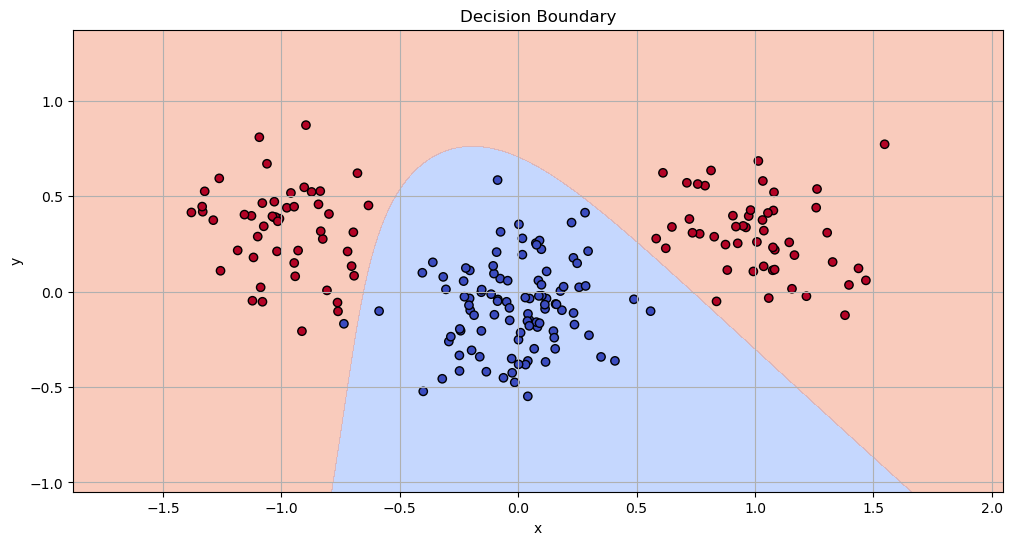

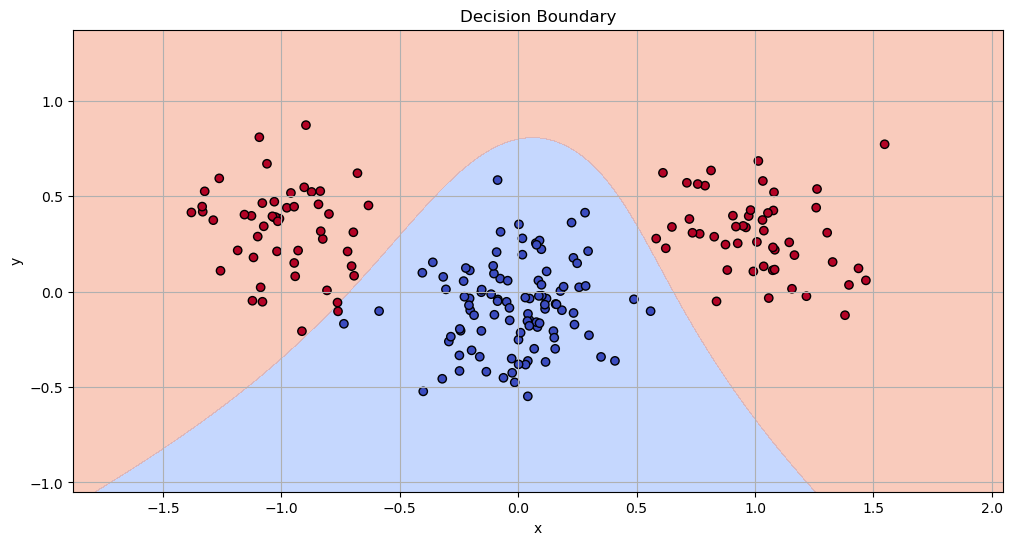

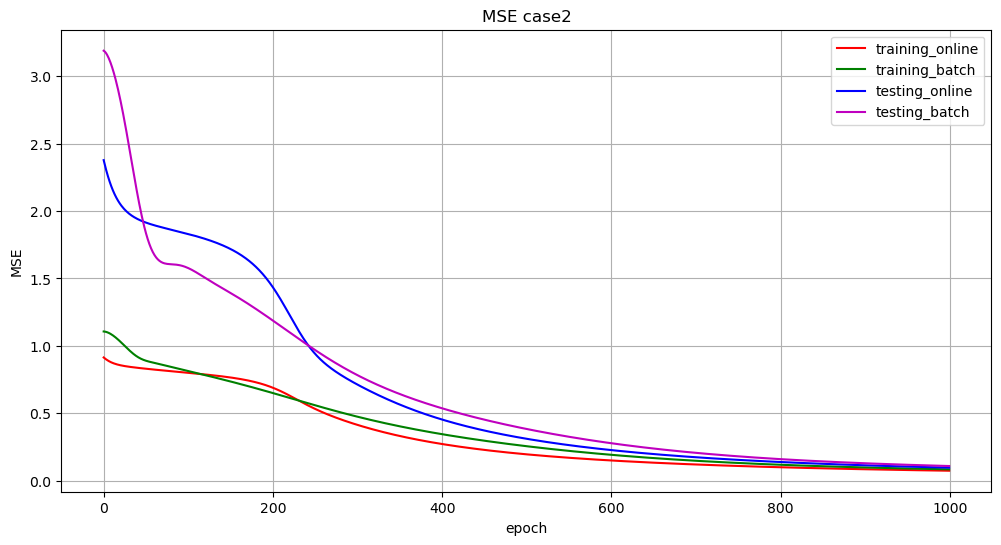

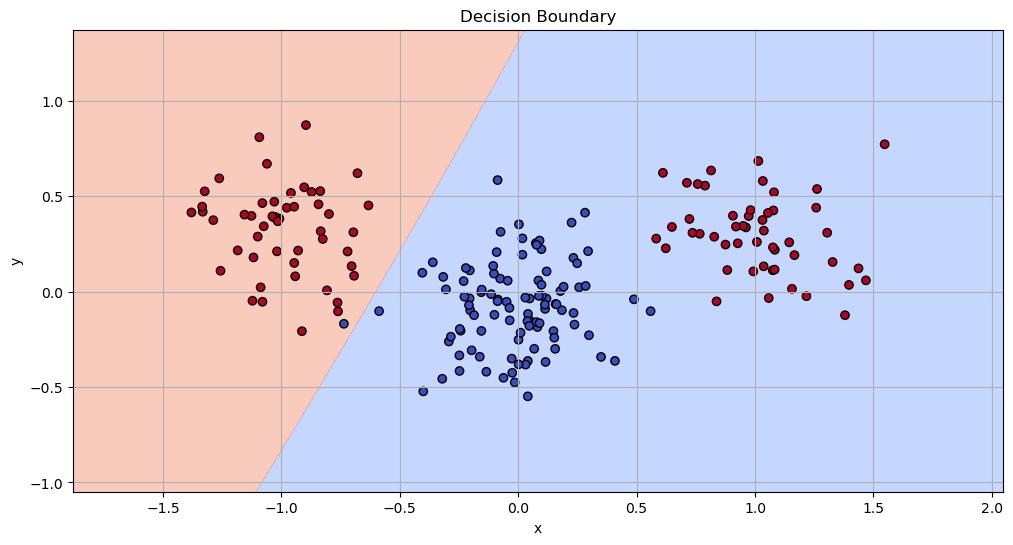

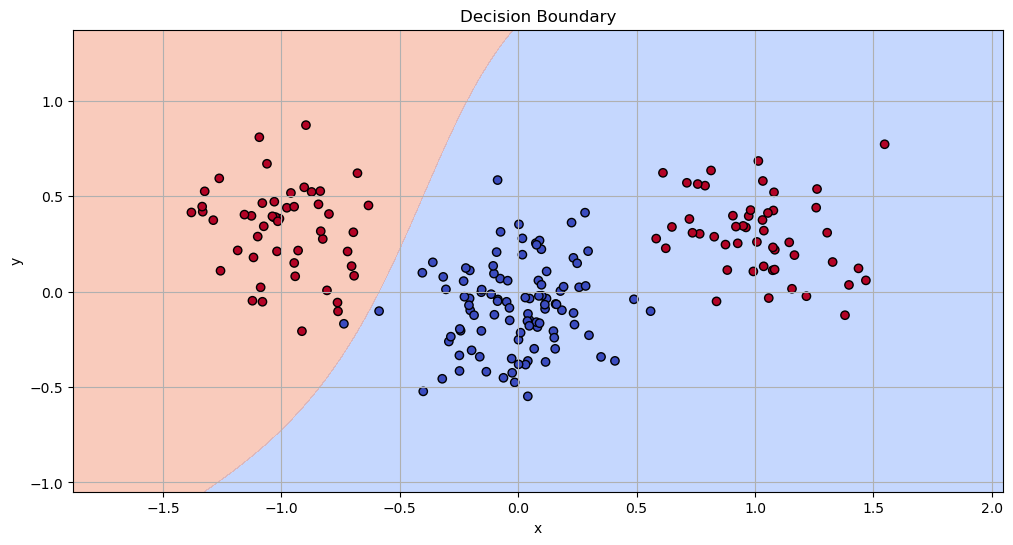

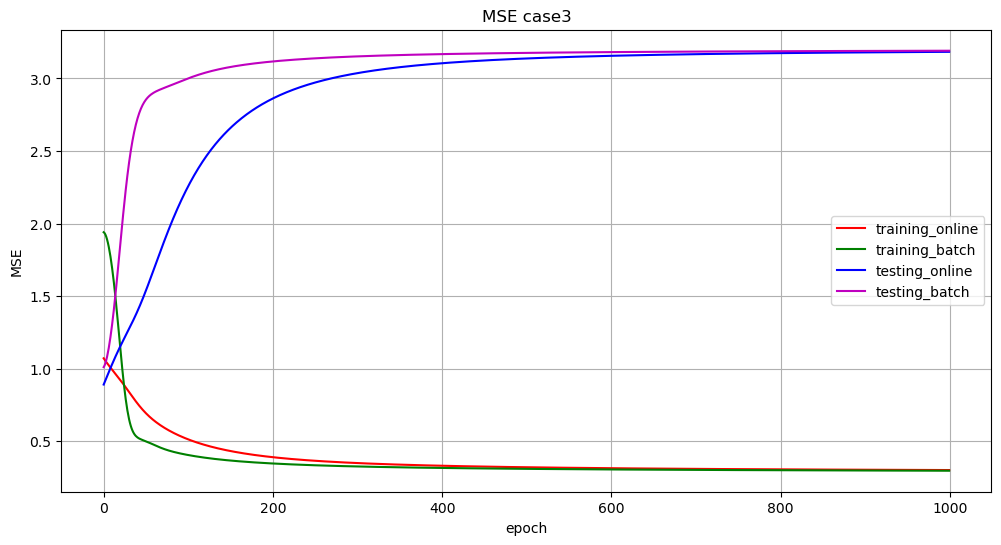

In [42]:
N = 3
n = 100


for i in range(N):
    if i == 0:  # case 1 : remove 25% from each class randomly
        a_indice = np.random.choice(n, size=int(0.75 * n), replace=False)
        b_indice = np.random.choice(n, size=int(0.75 * n), replace=False)
    elif i == 1:  # case 2 : only remove 50% randomly from classA
        a_indice = np.random.choice(n, size=int(0.5 * n), replace=False)
        b_indice = np.arange(n)
    elif i == 2:  # case 3
        minus = np.where(ClassA[0, :n] < 0)[0]
        posits = np.where(ClassA[0, :n] > 0)[0]
        a_indice = np.concatenate((
            np.random.choice(minus, size=int(0.8 * len(minus)), replace=False),
            np.random.choice(posits, size=int(0.2 * len(posits)), replace=False)
        ))
        b_indice = np.arange(n)
    
    ClassA_training = ClassA[:,a_indice]
    ClassA_training_labels = np.ones(len(a_indice)).reshape(1,len(a_indice))

    ClassA_testing = np.delete(ClassA, a_indice, axis = 1)
    ClassA_testing_labels = np.ones(n-len(a_indice)).reshape(1,n-len(a_indice))

    ClassB_training = ClassB[:,b_indice]
    ClassB_training_labels = -np.ones(len(b_indice)).reshape(1,len(b_indice))

    classB_testing = np.delete(ClassB, b_indice, axis = 1)
    classB_testing_labels = -np.ones(n-len(b_indice)).reshape(1,n-len(b_indice))

    
    training_data = np.concatenate((ClassA_training, ClassB_training),axis = 1)
    training_labels = np.concatenate((ClassA_training_labels,ClassB_training_labels),axis = 1)

    #shuffle 
    shuffle_index = np.random.permutation(training_data.shape[1])
    training_data = training_data[:,shuffle_index]
    training_labels = training_labels[:,shuffle_index]

    testing_data = np.concatenate((ClassA_testing,classB_testing),axis = 1)
    testing_labels = np.concatenate((ClassA_testing_labels,classB_testing_labels),axis = 1)
    # testing_data = ClassA_testing
    # testing_labels = ClassA_testing_labels

    #parameters
    input_size = training_data.shape[0]
    learning_rate  = 0.001
    alpha = 0.9
    hidden_layer = 5
    output_size = 1
    epochs = 1000
    mlp_batch = MLP(input_size,hidden_layer,output_size)
    mlp_online = MLP(input_size,hidden_layer,output_size)
    mse_sublist_training_online = []
    mse_sublist_training_batch = []
    mse_sublist_testing_online = []
    mse_sublist_testing_batch = []
    
    for epoch in range(epochs):
        # Online mode
        for j in range(training_data.shape[1]):
            output_online = mlp_online.forward(training_data[:, j:j+1])
            mlp_online.backward(training_data[:, j:j+1], training_labels[:, j:j+1], output_online)
            mlp_online.weight_update(learning_rate, alpha)
        loss_training_online = mlp_online.mse(mlp_online.forward(training_data), training_labels)
        loss_testing_online = mlp_online.mse(mlp_online.forward(testing_data), testing_labels)
        mse_sublist_training_online.append(loss_training_online)
        mse_sublist_testing_online.append(loss_testing_online)

        # Batch mode
        output_batch = mlp_batch.forward(training_data)
        mlp_batch.backward(training_data, training_labels, output_batch)
        mlp_batch.weight_update(learning_rate, alpha)
        loss_training_batch = mlp_batch.mse(output_batch, training_labels)
        loss_testing_batch = mlp_batch.mse(mlp_batch.forward(testing_data), testing_labels)
        mse_sublist_training_batch.append(loss_training_batch)
        mse_sublist_testing_batch.append(loss_testing_batch)
    
    
    plot_decision_boundary(mlp_batch, class_total, labels)
    plot_decision_boundary(mlp_online, class_total, labels)
    plt.figure(figsize=(12,6))
    plt.plot(mse_sublist_training_online, label='training_online', c='r')
    plt.plot(mse_sublist_training_batch, label='training_batch', c='g')
    plt.plot(mse_sublist_testing_online, label='testing_online', c='b')
    plt.plot(mse_sublist_testing_batch, label='testing_batch', c='m')
    plt.legend()
    plt.title(f'MSE case{i+1}')
    plt.xlabel('epoch')
    plt.ylabel('MSE')
    plt.grid(True)
    plt.show()


    